In [1]:
#In this Notebook we will write an KNN algorithm from scratch and try to adapt it to also use it in the iris Dataset

#What we will do for the KNN algorithm
#1: You normalize your data in another table
#2: You code a simple euclid distance function
#3: You take a point and calculate the distance to all points
#4: You take the list from above and sort it
#5: You aggregate by target variable
#6: you take the max to determine the target class

#What we will have to do aswell: find an algorithm which can take any kind of data 
#and find different clusters on it. But on this one later more (K-Means)

%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import datasets
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 9)

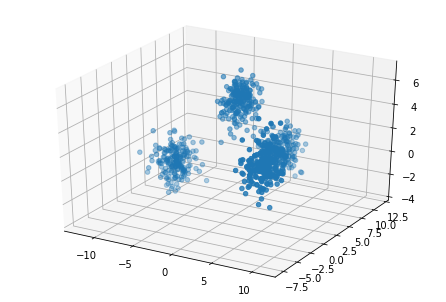

In [2]:
#Create a dataset on which we will test our algorithm on which we know there are clusters
X,y = make_blobs(n_samples=800, n_features=3, centers=4)

#aand let's have a quick look at it
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])


In [3]:
# Let's get started.
#Step 1: Normalize data

def norm_frame(X,n):
    norm_data = pd.DataFrame(X)
    for i in range(n):
        norm_data[i] = norm_data[i].apply(lambda x: (x-min(norm_data[i]))/(max(norm_data[i])-min(norm_data[i])))
    return (norm_data)
    
norm_data = norm_frame(X,3)
##The 3 as a parameter tells how many columns are in the dataframe. The iterative function isn't working (cominb back on this one)
    #for i in range(len(X[[]])):
    #    norm_data = norm_data[i].apply(lambda x: (x-min(norm_data[i]))/(max(norm_data[i])-min(norm_data[i])))
norm_data.head()


##If we want to see that the shape of data didn't change, we can check with this:
#fig_n = plt.figure()
#ax_n = Axes3D(fig_n)
#ax_n.scatter(X[:, 0], X[:, 1], X[:, 2])

,0,1,2
0,0.948954,0.100486,0.609181
1,0.897526,0.113084,0.611828
2,0.447939,0.656287,0.678885
3,0.212839,0.676782,0.295062
4,0.078370,0.504116,0.510289


In [4]:
#Step 2: write euclidean distance function

def euclidean_distance(target, distance_to):
    distance = 0.0
    for i in range(len(target)):
        distance = distance + (target[i] - distance_to[i])**2
    return sqrt(distance)

#and lets give it a quick test. NOTE: this function will only work with handed arrays or lists, because it uses len()
d = euclidean_distance([0,0,0],[1,1,1])
d

1.7320508075688772

In [5]:
# ...Neet! Let's merge step 3 and 4 into one function called: get_neighbors

#  We take the first row as point we look at
row0 = norm_data.iloc[0,:] 
dist_to_data = []
dist_to_dataset = []


#Step 4: write the neighbors function

def get_neighbors(target, to_data_set):
    for row in range(len(to_data_set)):
        dist_to_data = euclidean_distance(target, to_data_set.iloc[row,:])
        dist_to_dataset.append(dist_to_data)
        
    return(dist_to_dataset)

neighbors = get_neighbors(norm_data.iloc[0,:], norm_data)

norm_data['distance'] = neighbors
norm_data.sort_values(by='distance', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
norm_data

#Super neet!
# The problem is now, we lost the information, to wich clusters the points belong (in the beginning asigned with y)
# But the problem is a gift because instead of adapting the code to also hand over these informations to
# clusters, we will find a way how to make our own clustering. We will probably use a k-means algorithm.
# Looking forward.




# we could use super easy 
# norm_data['cluster'] = y 
# after the function call, before sorting. With it we would have the clustering shifted by one row because of the row0 logic to calculate distance
# but even tho it'd be shifted it would work for our purposes but wouldn't be nice and clean

,0,1,2,distance
0,0.948954,0.100486,0.609181,0.000000
673,0.959521,0.083463,0.608239,0.020058
619,0.918811,0.093399,0.614537,0.031424
96,0.954311,0.132739,0.613069,0.032925
743,0.981463,0.086720,0.609449,0.035305
281,0.927772,0.088678,0.583115,0.035603
124,0.918437,0.103494,0.589746,0.036305
784,0.973462,0.129425,0.616879,0.038696
27,0.943471,0.135068,0.586849,0.041529
578,0.924009,0.066992,0.597637,0.043329


In [6]:
# Lets store this dataset somewhere so we can continue working on it
pd.DataFrame.to_csv(norm_data, path_or_buf: https://github.com/Bummelnderboris/DS_ESA_10')
    
      
    

',0,1,2,distance\r\n0,0.9489535012140253,0.10048605691210602,0.6091814737003545,0.0\r\n673,0.9595208457872336,0.08346335479851974,0.6082387849059994,0.020058160951089515\r\n619,0.9188112793996395,0.09339865542684929,0.6145367929761805,0.031423943741467134\r\n96,0.9543105906145064,0.1327387643910204,0.6130688699156431,0.03292487503240986\r\n743,0.9814626630537048,0.08671997517465431,0.6094490478863279,0.035304705151943575\r\n281,0.9277720540980058,0.08867753789788323,0.5831147180298705,0.03560295738309816\r\n124,0.9184368440799756,0.10349369707214254,0.5897457337131461,0.03630509951535435\r\n784,0.9734621272761098,0.12942479272059446,0.6168790837736357,0.03869594788197929\r\n27,0.9434713788085948,0.1350677880848862,0.5868494280508809,0.041529147112175695\r\n578,0.9240088276960458,0.06699191116248326,0.5976372448265087,0.04332855590378357\r\n522,0.9281051076480784,0.12511428990921097,0.5778956015921783,0.044944534355241234\r\n250,0.9652295632069757,0.061125344861646266,0.6251039773322546

In [7]:
# Annex: 

# Normalized iris
#i_n0 = pd.DataFrame(iris['data'])
#i_n1 = pd.DataFrame(iris['target'])
#
#iris_norm = [i_n0, i_n1]
#iris_norm = pd.concat(iris_norm, axis=1 , sort= False)
#iris_norm.columns = ['v1','v2','v3','v4','class']
#
#iris_norm['v1'] = iris_norm['v1'].apply(lambda x : (x-min(iris_norm['v1']))/max(iris_norm['v1']-min(iris_norm['v1'])))
#iris_norm['v2'] = iris_norm['v2'].apply(lambda x : (x-min(iris_norm['v2']))/max(iris_norm['v2']-min(iris_norm['v2'])))
#iris_norm['v3'] = iris_norm['v3'].apply(lambda x : (x-min(iris_norm['v3']))/max(iris_norm['v3']-min(iris_norm['v3'])))
#iris_norm['v4'] = iris_norm['v4'].apply(lambda x : (x-min(iris_norm['v4']))/max(iris_norm['v4']-min(iris_norm['v4'])))
#
#iris_norm